In [1]:
import pandas as pd
import matplotlib

In [2]:
URM = pd.read_csv('../Input/interactions_and_impressions.csv').rename(columns = {'Impressions':'ItemVisualizedOnVideo','Data':'IfWatchedZero'})
URM.head()

#Note: NaN means Not A Number -> in our case means that the TV Series has been shown alone, with no other items!

/var/folders/tt/9v6608x550n51759gpcrffsc0000gn/T/ipykernel_46860/105706314.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  URM = pd.read_csv('../Input/interactions_and_impressions.csv').rename(columns = {'Impressions':'ItemVisualizedOnVideo','Data':'IfWatchedZero'})


,UserID,ItemID,ItemVisualizedOnVideo,IfWatchedZero
0,0,11,"0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19",1
1,0,21,NaN,0
2,0,21,NaN,0
3,0,21,"20,21,22,23,24,25,26,27,28,29",0
4,0,21,NaN,1


In [6]:
WatchedURM = URM.loc[URM['IfWatchedZero'] == 0]

num_watched_per_user = WatchedURM.groupby('UserID').count()['IfWatchedZero']
print('The average number of watched (or at least started) episodes per user is: {}'.format(num_watched_per_user.mean()))
print('The median of the number of watched (or at least started) episodes per user is: {}'.format(num_watched_per_user.median()))

The average number of watched (or at least started) episodes per user is: 85.69696605731582
The median of the number of watched (or at least started) episodes per user is: 33.0


<AxesSubplot:xlabel='Watched Episodes', ylabel='Number Of User'>

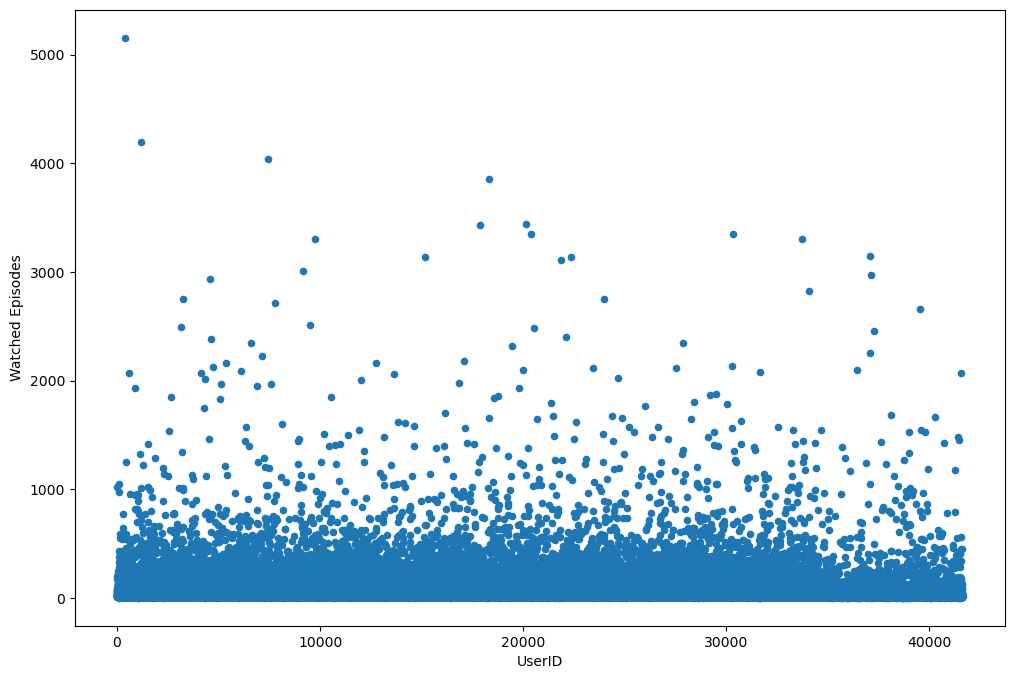

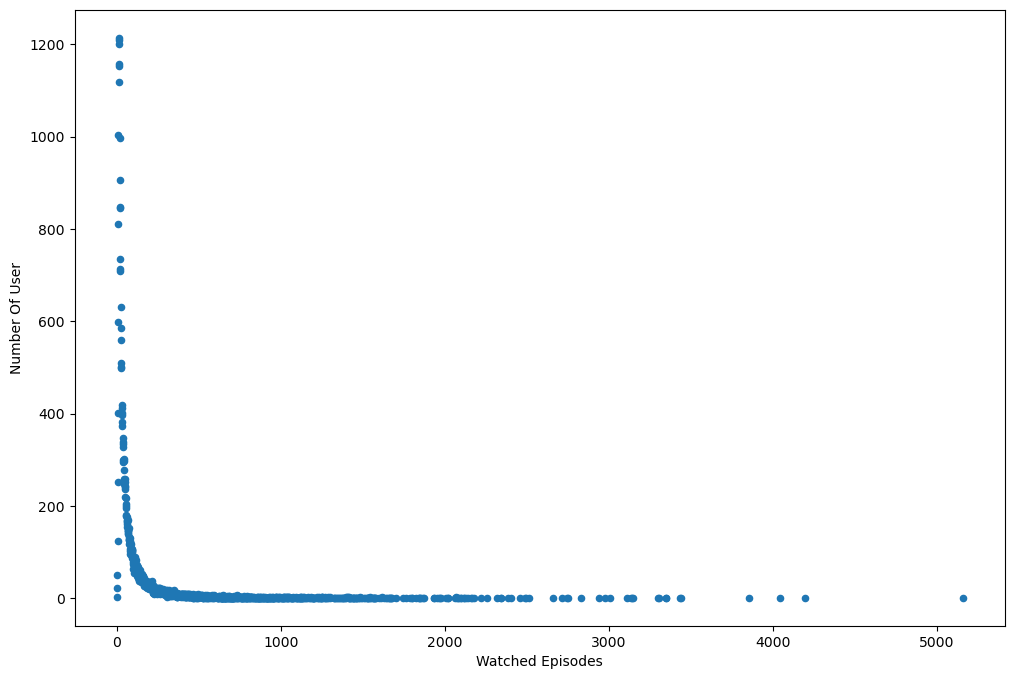

In [10]:
num_watched_per_user = num_watched_per_user.rename(columns = {'IfWatchedZero':'Watched Episodes'})

num_users_per_num_watched = num_watched_per_user.groupby('Watched Episodes').count().reset_index(level=['Watched Episodes']).rename(columns = {'UserID':'Number Of User'})

num_watched_per_user.plot(
    kind='scatter',
    x='UserID',
    y='Watched Episodes',
    figsize=(12,8)
)

num_users_per_num_watched.plot(
    kind='scatter',
    x='Watched Episodes',
    y='Number Of User',
    figsize=(12,8)
)